In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

path = r'../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

X = cleanData[['Adult Mortality','Alcohol','BMI','HIV/AIDS','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Developed']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

coef = logReg.coef_
intercept = logReg.intercept_

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-0.01149161  0.4058046  -0.01263924 -3.60600308 -0.34368246  0.03308233
  -0.28361344  0.16007858]]
The Intercept is: [-3.5077839]


c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
predictions = logReg.predict(X_test)

for i, result in zip(X_test.values, predictions):
    result_str = "Developed" if result == 1 else "Not Developed"
    print(f"Features: {i}, Predicted result: {result_str}")

Features: [19.     0.06   2.5    0.2    1.8    1.7    0.638 11.   ], Predicted result: Not Developed
Features: [1.32e+02 9.30e+00 5.51e+01 1.00e-01 2.40e+00 2.40e+00 7.43e-01 1.35e+01], Predicted result: Not Developed
Features: [86.    11.83  57.1    0.1    1.1    1.1    0.877 16.4  ], Predicted result: Developed
Features: [4.64e+02 6.00e+00 2.99e+01 1.33e+01 6.80e+00 6.70e+00 4.52e-01 1.01e+01], Predicted result: Not Developed
Features: [4.53e+02 1.56e+00 1.98e+01 7.30e+00 9.10e+00 9.10e+00 3.45e-01 6.40e+00], Predicted result: Not Developed
Features: [5.25e+02 1.27e+00 1.69e+01 1.69e+01 7.00e+00 6.90e+00 4.00e-01 9.60e+00], Predicted result: Not Developed
Features: [197.      6.2    43.2     0.8     3.6     3.5     0.691  12.5  ], Predicted result: Not Developed
Features: [ 1.     1.82  61.4    0.1    4.7    4.6    0.733 13.2  ], Predicted result: Not Developed
Features: [1.27e+02 1.00e-02 5.90e+01 1.00e-01 1.90e+00 1.90e+00 8.56e-01 1.65e+01], Predicted result: Not Developed
Feature

c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


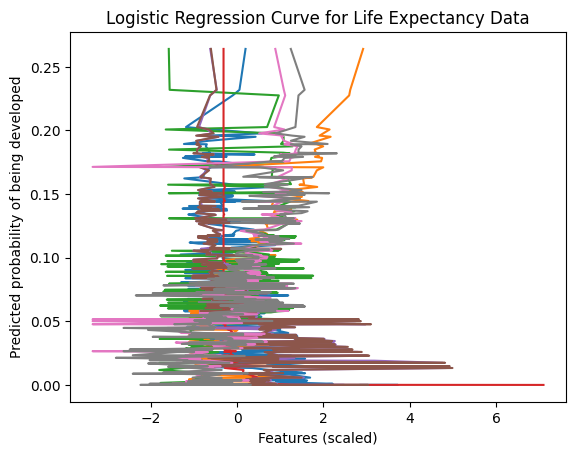

In [7]:
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the test data
y_pred_proba = logReg.predict_proba(X_test_scaled)[:, 1]

# Sort the test data by the predicted probabilities
X_test_sorted = X_test_scaled[y_pred_proba.argsort(), :]
y_pred_proba_sorted = y_pred_proba[y_pred_proba.argsort()]

# Plot the logistic regression curve
plt.plot(X_test_sorted, y_pred_proba_sorted, label='Logistic Regression')

# Add labels and title
plt.xlabel('Features (scaled)')
plt.ylabel('Predicted probability of being developed')
plt.title('Logistic Regression Curve for Life Expectancy Data')

# Show the plot
plt.show()